In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pylab as plt
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train , y_train), (x_test, y_test) = mnist.load_data()


In [2]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28)
(28, 28)


In [3]:
model = Sequential()

model.add( LSTM(128, input_shape = (x_train.shape[1:]), activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add( LSTM(128, activation='relu'), )
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))



In [5]:
opt = tf.keras.optimizers.Adam(learning_rate= 1e-3, beta_1= 1e-5)


model.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])

history = model.fit(x_train, y_train , epochs = 3, validation_data = (x_test, y_test))




Epoch 1/3


ValueError: in user code:

    C:\Users\mr Hai\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py:830 train_function  *
        return step_function(self, iterator)
    C:\Users\mr Hai\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py:813 run_step  *
        outputs = model.train_step(data)
    C:\Users\mr Hai\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py:771 train_step  *
        loss = self.compiled_loss(
    C:\Users\mr Hai\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py:201 __call__  *
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\mr Hai\AppData\Roaming\Python\Python39\site-packages\keras\losses.py:142 __call__  *
        losses = call_fn(y_true, y_pred)
    C:\Users\mr Hai\AppData\Roaming\Python\Python39\site-packages\keras\losses.py:246 call  *
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\mr Hai\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:206 wrapper  **
        return target(*args, **kwargs)
    C:\Users\mr Hai\AppData\Roaming\Python\Python39\site-packages\keras\losses.py:1630 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\mr Hai\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\mr Hai\AppData\Roaming\Python\Python39\site-packages\keras\backend.py:4827 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\mr Hai\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (32, 1) and (32, 10) are incompatible


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 28, 128)           80384     
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [14]:

results = model.predict(x_test)

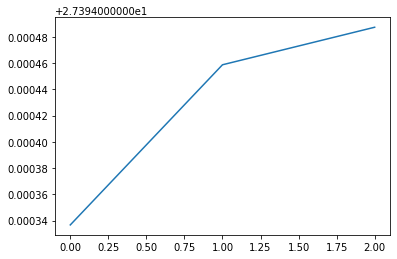

In [8]:
plt.plot(history.history['loss'])
plt.show()